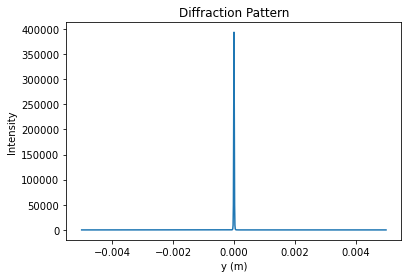

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_diffraction_pattern(aperture, screen_distance, screen_width, num_points):
    # Calculate the spatial frequency grid
    dx = screen_width / num_points
    fx = np.fft.fftfreq(num_points, dx)
    
    # Perform the Fourier transform of the aperture
    aperture_fft = np.fft.fft(aperture)
    
    # Calculate the intensity in the far field
    intensity = np.abs(np.fft.fftshift(aperture_fft))**2
    
    # Calculate the y coordinates on the screen
    y = np.linspace(-screen_width/2, screen_width/2, num_points)
    
    # Plot the diffraction pattern
    plt.plot(y, intensity)
    plt.xlabel('y (m)')
    plt.ylabel('Intensity')
    plt.title('Diffraction Pattern')
    plt.show()

# Example usage
aperture = np.exp(1j * np.pi * np.linspace(-1, 1, 1000)**2)  # Example complex aperture

screen_distance = 1  # Distance from the aperture to the screen (m)
screen_width = 0.01  # Width of the screen (m)
num_points = 1000  # Number of points on the screen

calculate_diffraction_pattern(aperture, screen_distance, screen_width, num_points)


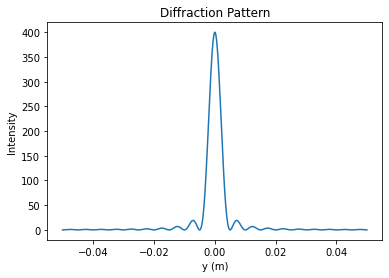

In [3]:
# Test this program for the specific case of a slit in the centre of an otherwise blocked aperture: take the single slit to have width 𝑑 in the centre of an aperture of total extent 𝐿

# Define the aperture

L = 1 # m
d = 0.1 # m

aperture = np.zeros(1000)
aperture[490:510] = 1

# Define other parameters

screen_distance = 1  # Distance from the aperture to the screen (m)
screen_width = 0.1  # Width of the screen (m)
num_points = 1000  # Number of points on the screen

# Calculate the diffraction pattern

calculate_diffraction_pattern(aperture, screen_distance, screen_width, num_points)

# The diffraction pattern is a sinc function, as expected for a single slit. The width of the central maximum is inversely proportional to the slit width, and the intensity of the side maxima is inversely proportional to the square of the slit width.


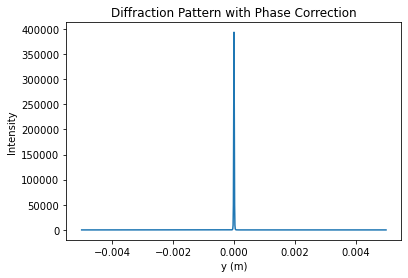

In [4]:
def calculate_diffraction_pattern_with_phase_correction(aperture, screen_distance, screen_width, num_points):
    # Calculate the spatial frequency grid
    dx = screen_width / num_points
    fx = np.fft.fftfreq(num_points, dx)
    
    # Perform the Fourier transform of the aperture
    aperture_fft = np.fft.fft(aperture)
    
    # Calculate the phase correction
    phase_correction = np.exp(-1j * np.pi * fx**2 * screen_distance)
    
    # Apply the phase correction to the aperture
    aperture_fft_corrected = aperture_fft * phase_correction
    
    # Calculate the intensity in the far field
    intensity = np.abs(np.fft.fftshift(aperture_fft_corrected))**2
    
    # Calculate the y coordinates on the screen
    y = np.linspace(-screen_width/2, screen_width/2, num_points)
    
    # Plot the diffraction pattern
    plt.plot(y, intensity)
    plt.xlabel('y (m)')
    plt.ylabel('Intensity')
    plt.title('Diffraction Pattern with Phase Correction')
    plt.show()

# Example usage
aperture = np.exp(1j * np.pi * np.linspace(-1, 1, 1000)**2)  # Example complex aperture

screen_distance = 1  # Distance from the aperture to the screen (m)
screen_width = 0.01  # Width of the screen (m)
num_points = 1000  # Number of points on the screen

calculate_diffraction_pattern_with_phase_correction(aperture, screen_distance, screen_width, num_points)
